In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import InputLayer, Convolution2D, Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score


## Memuat Data

Data fashion mnist dimuat dari kumpulan-kumpulan dataset yang sudah ada di *library* Keras. Berdasarkan keterangan pada [dokumentasinya](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles) data itu terdiri suatu data latih yang terdiri dari 60000 *examples* atau observasi-observasi berlabel. Tiap-tiap observasi tersusun atas numpy *array* berukuran 28x28 yang merepresentasikan jumlah *pixel* dari tiap-tiap observasi. Di samping itu juga ada dataset uji, yang meskipun namanya data uji namun juga tetap memiliki label. *Return values*-nya berupa 2 *tuple*. Anggota-anggota dari tiap-tiap *tuple* itu memiliki tipe data numpy *ndarray*.

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Melihat Data dan Memeriksa Data

Beberapa cara ditempuh untuk memastikan ukuran data yang dimuat sudah sesuai dengan yang ada didokumentasinya. Untuk ukuran fitur data latihnya tersusun dari 60000 observasi tiap-tiap observasi berukuran 28x28 pixel sehingga ukurang *dataset* fitur latih adalah 60000x28x28 sedangkan untuk *dataset* label latih adalah 60000x1. Untuk data uji, memiliki dimensi data fitur uji 10000x28x28 dan dimensi data label uji 10000x1


In [0]:
print('Ukuran X_train {}'.format(X_train.shape))
print('Ukuran y_train {}'.format(y_train.shape))
print('Ukuran X_test {}'.format(X_test.shape))
print('Ukuran y_test {}'.format(y_test.shape))

Ukuran X_train (60000, 28, 28)
Ukuran y_train (60000,)
Ukuran X_test (10000, 28, 28)
Ukuran y_test (10000,)


Selanjutnya adalah untuk melihat representasi gambar/ ke dalam *pixel* apakah di antara rentang kontinyu 0-1 atau rentang diskrit 0-255. Bisa dilakukan hanya dengan melihat nilai minimal dan maksimalnya. Selain itu perlu juga untuk melihat kemungkinan adanya label yang tidak sesuai. Dari dokumentasi Keras, labelnya ada 10 bernilai 0-9 untuk merepresentasikan label yang sebenarnya. Perlu dilihat bila ada label yang diluar rentang 0-9

In [0]:
print('=== X_train ===\nNilai min = {} nilai max = {}'.format(np.min(X_train), np.max(X_train)))
print('\n=== X_test ===\nNilai min = {} nilai max = {}'.format(np.min(X_test), np.max(X_test)))
print('\nLabel data latih = {}'.format(np.unique(y_train)))
print('\nLabel data uji = {}'.format(np.unique(y_test)))

=== X_train ===
Nilai min = 0 nilai max = 255

=== X_test ===
Nilai min = 0 nilai max = 255

Label data latih = [0 1 2 3 4 5 6 7 8 9]

Label data uji = [0 1 2 3 4 5 6 7 8 9]


Untuk melihat lebih jauh lagi tipe data anggota-anggota dari *dataset* tersebut apakah bernilai *integer*, *float* atau malah *string*. Akan lebih mudah jika mengguanakan salah satu metode pandas *dataframe* yaitu, info(). Sehingga datanya perlu diubah dahulu ke dalam *dataframe* pandas. Berdasarkan kode di bawah ini tipe datanya sudah numerik yaitu uint8.

In [0]:
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
y_train_df = pd.DataFrame(y_train)
X_test_df  = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
y_test_df  = pd.DataFrame(y_test)

print('Ukuran X_train_df  {}'.format(X_train_df.shape))
print('Ukuran y_train_df  {}'.format(y_train_df.shape))
print('Ukuran X_test_df  {}'.format(X_test_df.shape))
print('Ukuran y_test_df  {}'.format(y_test_df.shape))

print('Info X_train')
print(X_train_df.info())
print('\nInfo y_train')
print(y_train_df.info())
print('\nInfo X_test')
print(X_test_df.info())
print('\nInfo y_test')
print(y_test_df.info())

Ukuran X_train_df  (60000, 784)
Ukuran y_train_df  (60000, 1)
Ukuran X_test_df  (10000, 784)
Ukuran y_test_df  (10000, 1)
Info X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
None

Info y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
0    60000 non-null uint8
dtypes: uint8(1)
memory usage: 58.7 KB
None

Info X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB
None

Info y_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
0    10000 non-null uint8
dtypes: uint8(1)
memory usage: 9.8 KB
None


Lihat 3 kolom pertama dari masing-masing *dataframe*

In [0]:
print(X_train_df.head(3))
print(y_train_df.head(3))
print(X_test_df.head(3))
print(y_test_df.head(3))

   0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    1    0  ...   76    0    0    0    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[3 rows x 784 columns]
   0
0  9
1  0
2  0
   0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0  ...    3  174  189   67    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[3 rows x 784 columns]
   0
0  9
1  2
2  1


Langkah selanjutnya adalah memeriksa kemungkinan adanya data yang bernilai NaN. Meskipun dari metode info() sudah terlihat tidak memiliki NaN. Namun itu eksplisit hanya pada data label, untuk data fitur hanya implisit saja. Sehingga akan dipastikan menggunakan kode di bawah ini. Pandas *dataframe* dikenakan pada metode isnull() akan bernilai True (1) untuk data bertipe NaN, lainnya False (0). Metode sum() pertama melakukan penjumlahan di sepanjang baris dan *return values*-nya adalah pandas *series* kemudian dijumlahkan kedua kalinya untuk menghitung ada tidaknya nilai NaN. Akan bernilai nol jika tidak ada NaN, bernilai lainnya (bilangan bulat positif) jika ada NaN.

In [0]:
print('Jumlah NaN di X_train_df = {}'.format(X_train_df.isnull().sum(axis=0).sum(axis=0)))
print('Jumlah NaN di X_test_df = {}'.format(X_test_df.isnull().sum(axis=0).sum(axis=0)))

Jumlah NaN di X_train_df = 0
Jumlah NaN di X_test_df = 0


Ukuran dari X_train, y_train, X_test dan y_test masih belum sesuai untuk arsitektur CNN. Bentuk dari X_train dan X_test perlu diubah ke bentuk jumlah_observasi x image_height x image_width x image_depth. Untuk y_train dan y_test perlu diubah ke bentuk *one hot*.

Selain itu representasi warna dalam angka masih diskrit di antara 0-255 sehingga nilai variabelnya bisa timpang begiupula ketika perhitungan, untuk itu perlu diskalakan ulang menjadi kontinyu di antara 0-1. 

In [0]:
img_height, img_width, img_depth = X_train.shape[1], X_train.shape[2], 1
print(img_height, img_width, img_depth)

28 28 1


Code dibawah ini untuk mengubah ukuran dari (jumlah_observasi x 28 x 28) menjadi (jumlah_observasi x 28 x 28 x1)dan juga untuk menskalakan ulang representasi warna menjadi kontinyu di antara 0-1. Selain itu juga mengubah nilai label ke bentuk *one hot*-nya sehingga bentuknya menjadi (jumlah_observasi x humlah_kelas).  

In [0]:
def reshape(fitur, target):
  fitur = fitur.reshape(fitur.shape[0], img_height, img_width, img_depth)
  target = np_utils.to_categorical(target, 10)
  fitur = fitur.astype('float32')
  fitur = fitur/255
  return fitur, target

In [0]:
X_train_baru, y_train_baru = reshape(X_train, y_train)
X_test_baru, y_test_baru = reshape(X_test, y_test)

# Cek ulang beberapa hal
print('Ukuran X_train_baru {}'.format(X_train_baru.shape))
print('Ukuran y_train_baru {}'.format(y_train_baru.shape))
print('Ukuran X_test_bar {}'.format(X_test_baru.shape))
print('Ukuran y_test_baru {}'.format(y_test_baru.shape))

print('\n=== X_train_baru ===\nNilai min = {} nilai max = {}'.format(np.min(X_train_baru), np.max(X_train_baru)))
print('\n=== X_test_baru ===\nNilai min = {} nilai max = {}'.format(np.min(X_test_baru), np.max(X_test_baru)))

Ukuran X_train_baru (60000, 28, 28, 1)
Ukuran y_train_baru (60000, 10)
Ukuran X_test_bar (10000, 28, 28, 1)
Ukuran y_test_baru (10000, 10)
=== X_train_baru ===
Nilai min = 0.0 nilai max = 1.0

=== X_test_baru ===
Nilai min = 0.0 nilai max = 1.0


## Visualisasi Data

Visualisasi data yang pertama adalah digunakan untuk mengetahui jumlah observasi dari masing-masing kelas pada dataset latih dan dataset uji. Tiap-t

In [0]:
def bar_plot(data1, labels1, jenis): #data1=X_train, labels1=y_train
  uplot_df = pd.DataFrame(data1.reshape(data1.shape[0], data1.shape[1]*data1.shape[2]))
  uplot_df[784] = labels1
  num_per_kelas = pd.DataFrame((uplot_df.groupby(784).size()))
  num_per_kelas[1] = range(0,10)

  nominal = {0:'T-shirt/top',
             1:'Trouser',
             2:'Dress',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

  num_per_kelas[1] = num_per_kelas[1].map(nominal)
  plt.bar(x=num_per_kelas[1], height=num_per_kelas[0], color='green')
  plt.title('Grafik Jumlah Observasi pada Suatu Kelas di Dataset '+str(jenis))
  plt.show()

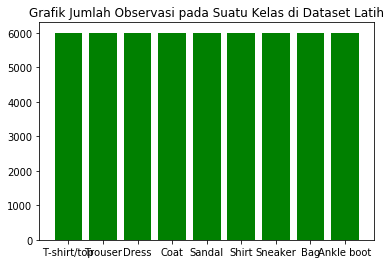

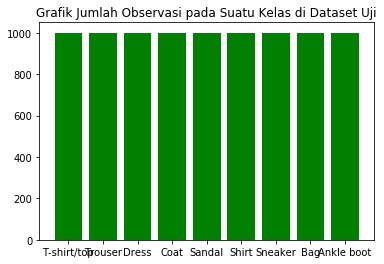

In [0]:
bar_plot(X_train, y_train, 'Latih')
bar_plot(X_test, y_test, 'Uji')

## Arsitektur CNN 1 

Arsitektur ConvNet ini terdiri dari 1 lapisan masukan (*input*), 4 lapisan konvolusi dan 2 lapisan *fully concected standard neural network* sebagai *hidden layer*-nya, dan 1 lapisan keluaran (*output*). 

*Hidden layer* yang pertama berupa lapisan konvolusi yang memiliki 64 *filter* dengan ukuran 4 x 4. Fungsi aktifasi yang digunakan adalah ReLU dan *padding*-nya bernilai *'same'*. Sehingga menghasilkan output dengan tinggi x lebar yang sama seperti input yaitu (28 x 28) ditambah ke dalaman 64 lapis (28 x 28 x 64).

*Hidden layer* kedua juga berupa lapisan konvolusi dengan argumen-argumen yang sama. Namun memiliki *maximum pooling* dengan ukuran (2 x 2) dan *stride* = 2 sehingga ouputnya adalah separuh dari sebelumnya, yaitu (14 x 14 x 64). Kemudian hanya 75% yang digunakan (*dropout* = 25%)

*Hidden layer* ketiga berupa lapisan konvolusi yang memiliki 64 *filter* berukuran (3 x 3). Fungsi aktifasi yang digunakan adalah ReLU dan *padding*-nya bernilai *'same'*. Sehingga menghasilkan output dengan tinggi x lebar x kedalaman yang sama seperti input yaitu (14 x 14 x 64).

*Hidden layer* keempat berupa lapisan konvolusi yang memiliki 64 *filter* berukuran (3 x 3). Namun diikuti dengan *maximum pooling* untuk memperkecil *feature map*/ *convolved layer* menjadi berukuran separuhnya (7 x 7 x 64). Dan digunakan hanya 0.6 bagiannya saja (*dropout* = 0.4)

Kemudian lapisan-lapisan konvolusi itu dihubungkan dengan lapisan *fully connected*/ *standard neural network*. Pertama kali output dari CNN perlu didatarkan kemudian dinormalisasi.
Lapisan *fully connected* yang pertama memiliki 512 *neuron* sedangkan yang kedua memiliki 64 *neuron*. Keduanya menggunakan fungsi aktifasi ReLU dan *dropout* = 0.2. *Output* lapisan *fully connected* kedua dinormalisasi.

Lapisan-lapisan yang sebelumnya itu kemudian dihubungkan dengan lapisan *output* yang memiliki 10 *neuron* untuk merepresentasikan kelas. Fungsi aktifasi yang digunakan adalah softmax.

Untuk menghitung *cost function* digunakan *categorical costentropy* menggunakan pengoptimasi Adam.

In [0]:
def cnn1():
  cnn = Sequential()
  
  cnn.add(InputLayer(input_shape=(img_height, img_width, img_depth)))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.25))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.4))
  
  cnn.add(Flatten())
  cnn.add(BatchNormalization())
  
  cnn.add(Dense(512, activation='relu'))
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(64, activation='relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(10, activation='softmax'))
  cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

  return cnn
cnn1().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
__________

Dibagian ini, data latih yang memiliki 60000 observasi akan dipecah secara acak menjadi data latih sebanyak 80% dan data validasi sebanyak 20% menggunakan *module* train_test_split. Menghasilkan 48000 data digunakan sebagai data latih dan 12000 data sebagai data validasi.

In [0]:
X_train_baru1, X_val, y_train_baru1, y_val = train_test_split(
    X_train_baru, y_train_baru, test_size=0.2, random_state=50
)

In [0]:
print(X_train_baru1.shape, y_train_baru1.shape)
print(X_val.shape, y_val.shape)


(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)


Bagian ini memulai melatih model dari arsitektur 1 menggunakan ukuran batch 250 dan *epoch* 60 kali. Model ini kemudian dihitung *loss* dan akurasinya di data validasi juga.

In [0]:
historia = cnn1().fit(
                      X_train_baru1,
                      y_train_baru1,
                      batch_size = 250,
                      epochs = 60,
                      verbose = 1,
                      validation_data = (X_val, y_val)
                      )

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 8s 172us/step - loss: 0.5944 - acc: 0.7900 - val_loss: 0.3338 - val_acc: 0.8796
Epoch 2/60
48000/48000 [==============================] - 7s 140us/step - loss: 0.3444 - acc: 0.8763 - val_loss: 0.2756 - val_acc: 0.8966
Epoch 3/60
48000/48000 [==============================] - 7s 142us/step - loss: 0.2891 - acc: 0.8950 - val_loss: 0.2412 - val_acc: 0.9055
Epoch 4/60
48000/48000 [==============================] - 7s 141us/step - loss: 0.2567 - acc: 0.9073 - val_loss: 0.2138 - val_acc: 0.9196
Epoch 5/60
48000/48000 [==============================] - 7s 142us/step - loss: 0.2362 - acc: 0.9148 - val_loss: 0.2095 - val_acc: 0.9204
Epoch 6/60
48000/48000 [==============================] - 7s 142us/step - loss: 0.2190 - acc: 0.9193 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 7/60
48000/48000 [==============================] - 7s 142us/step - loss: 0.2063 - acc: 0.9251 - val_loss: 0.1975 - 

Bagian ini digunakan untuk menampakkan grafik akurasi dan *loss* dari model yang sudah dilatih di data latih dan divalidasi di data validasi.

<class 'list'>
60


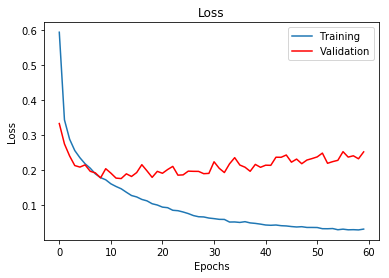

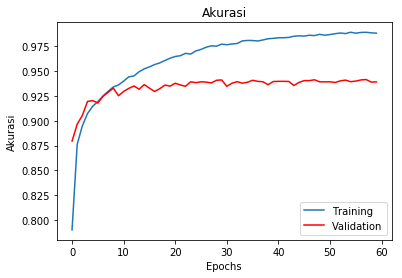

In [0]:
# Siapkan data untuk plotting loss dan akurasi pada data laith dan validasi
loss = historia.history['loss']
acc  = historia.history['acc']
val_loss = historia.history['val_loss']
val_acc = historia.history['val_acc']

print(type(loss))
print(len(loss))

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

Kemudian model yang telah dilatih itu menghasilkan suatu model yang bisa digunakan untuk memprediksi akurasi dan *loss* ketika model itu digunakan di data uji.

In [0]:
model_1 = historia.model

In [0]:
prediksi = model_1.predict(X_test_baru)
prediksi1 = np.argmax(prediksi, axis=1)
print('Akurasi model di data uji= {}'.format(np.round(accuracy_score(y_test, prediksi1)*100, 2)))

Akurasi model di data uji= 93.43
